In [1]:
from __future__ import print_function, division
import os
from collections import OrderedDict
import logging

import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# Make the plots look pretty
matplotlib.rc('font',size=13)
matplotlib.rc('legend', numpoints=1)
matplotlib.rc('image', cmap='inferno')
matplotlib.rc('image', interpolation='none')
# Use the same color cylcer as Seaborn
from cycler import cycler
color_cycle = [u'#4c72b0', u'#55a868', u'#c44e52', u'#8172b2', u'#ccb974', u'#64b5cd']
matplotlib.rcParams['axes.prop_cycle'] = cycler("color", color_cycle)

import lsst.afw.table as afwTable
import lsst.log as log
import lsst.meas.deblender
from lsst.meas.deblender import nmf, proximal, display
import lsst.meas.deblender.utils as debUtils

logger = logging.getLogger("lsst.meas.deblender")
logger.setLevel(logging.INFO)
log.setLevel("", log.INFO)

INFO:lsst.meas.deblender.proximal:Total parents: 41
INFO:lsst.meas.deblender.proximal:Unblended sources: 25
INFO:lsst.meas.deblender.proximal:Sources with multiple peaks: 16


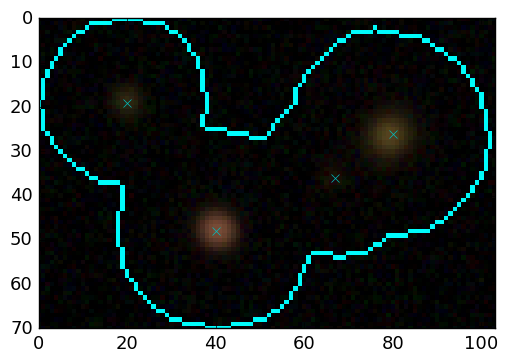

In [2]:
dataPath = os.path.abspath(os.path.join(os.path.dirname(os.path.realpath('__file__')), '..','data', 'sim_data'))
filters = ["g","r", "i","z",'y']
imgFilename = os.path.join(dataPath, "test2/{0}_{1}.fits")
catFilename = os.path.join(dataPath, "test2/det_merge.fits")
simFilename = os.path.join(dataPath, "test2/catalog_true.fits")

expDb = proximal.ExposureDeblend(filters, imgFilename, catFilename, simFilename)
#display.plotColorImage(calexps=expDb.calexps, filterIndices=[2,1,0], contrast=1, figsize=(8,8));
condition = expDb.mergedTable["peaks"]==4
#condition = (expDb.mergedTable["peaks"]>2) & (expDb.mergedTable["peaks"]<10)
footprint, peaks = expDb.getParentFootprint(parentIdx=0, condition=condition, contrast=1)
deblend = proximal.DeblendedParent(expDb, footprint, peaks)

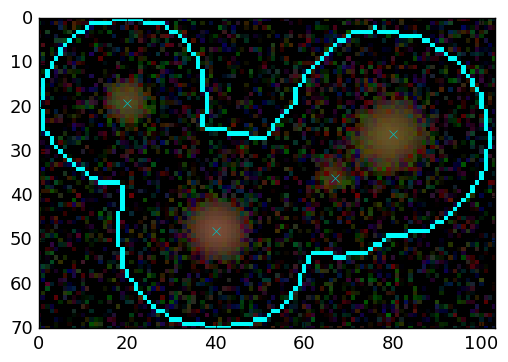

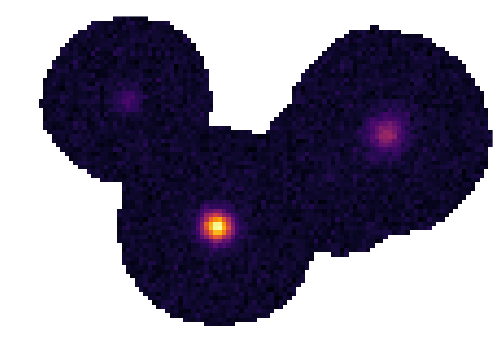

INFO:lsst.meas.deblender.proximal:constraints: MS
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Shape: (71, 104)
INFO:lsst.meas.deblender.proximal_nmf:Beginning Loop
INFO:lsst.meas.deblender.proximal_nmf:499 iterations
INFO:lsst.meas.deblender.proximal:Filter g
INFO:lsst.meas.deblender.proximal:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender.proximal:Max difference: 15.1242440019
INFO:lsst.meas.deblender.proximal:Residual difference 199.3%
INFO:lsst.meas.deblender.proximal:Filter r
INFO:lsst.meas.deblender.proximal:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender.proximal:Max difference: 32.4867726498
INFO:lsst.meas.deblender.proximal:Residual difference 260.2%


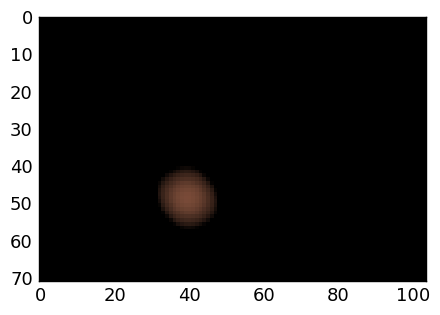

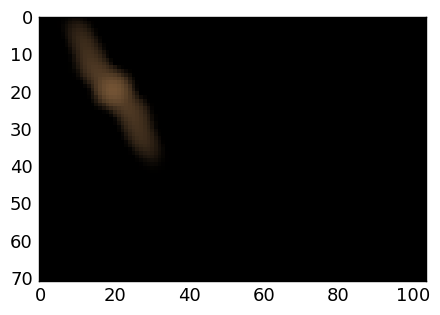

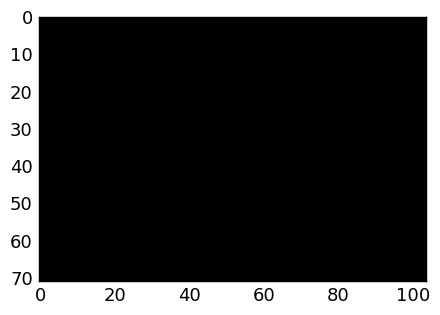

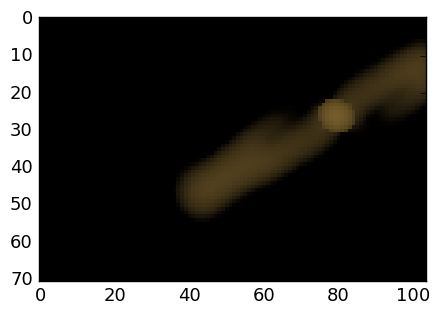

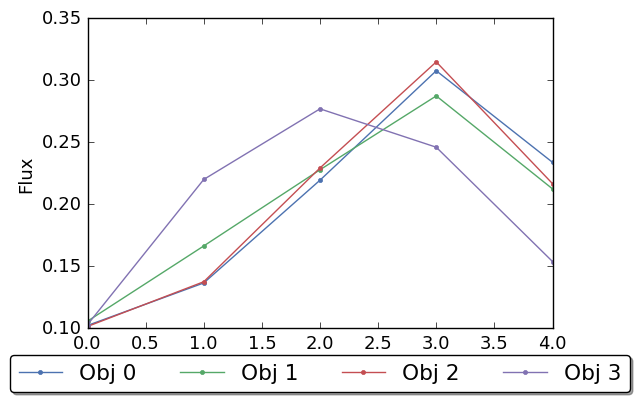

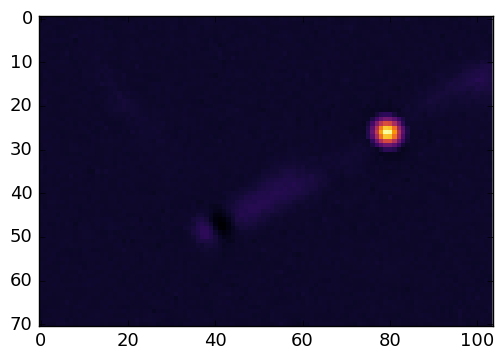

In [3]:
#%time glmm = expDb.deblendParent(condition=condition, display=True, maxiter=500, constraints='MS', nonSymmetricFill=0, algorithm="GLMM", usePsf=True, psfThresh=3e-3, l0_thresh=.005)
glmm = expDb.deblendParent(condition=condition, display=True, maxiter=500, constraints='MS', usePsf=True, psfThresh=3e-3, l0_thresh=.005)

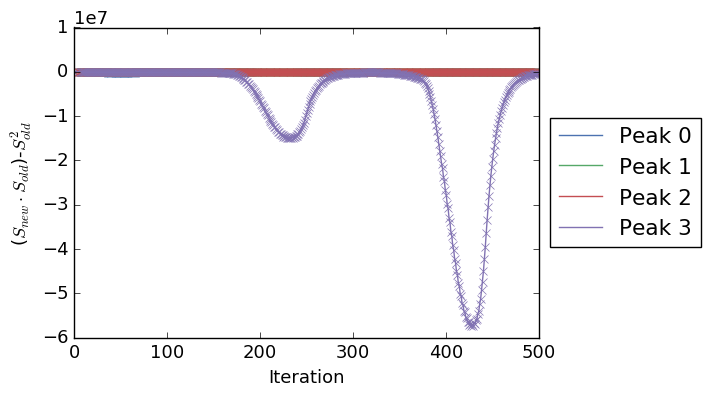

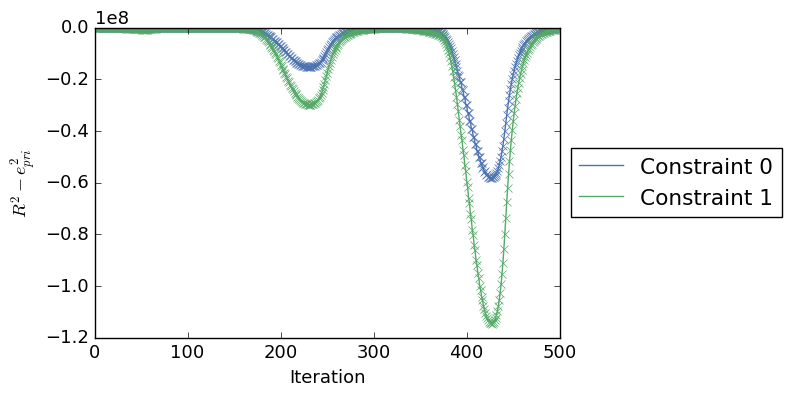

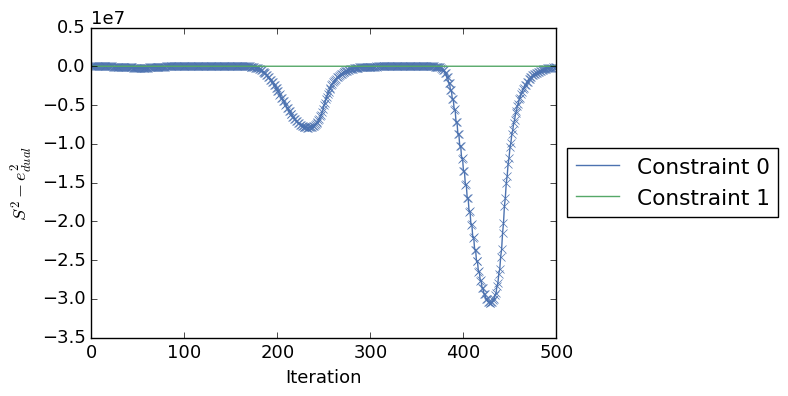

In [4]:
glmm.convergencePlots()

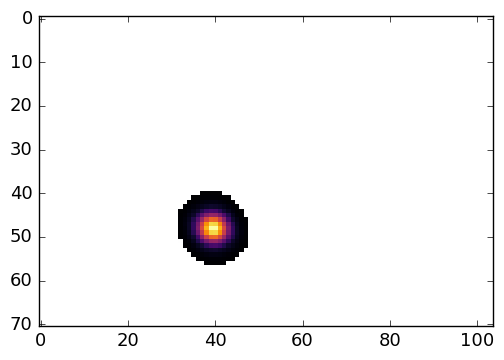

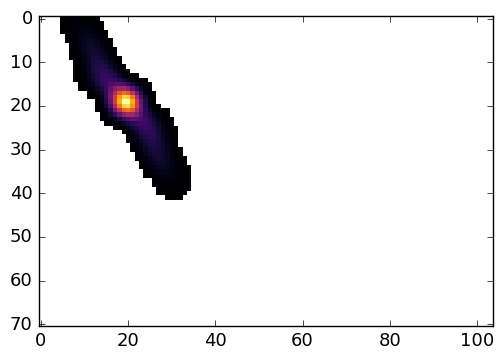

/Users/fred/lsst/code/lsstswig2/miniconda/lib/python2.7/site-packages/numpy/ma/core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


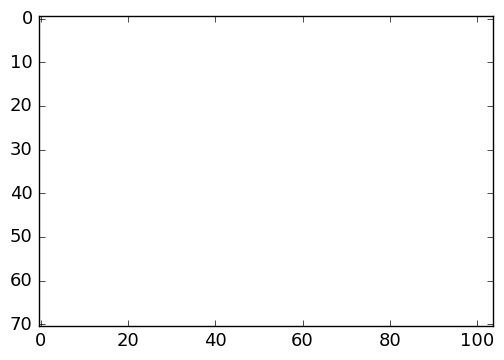

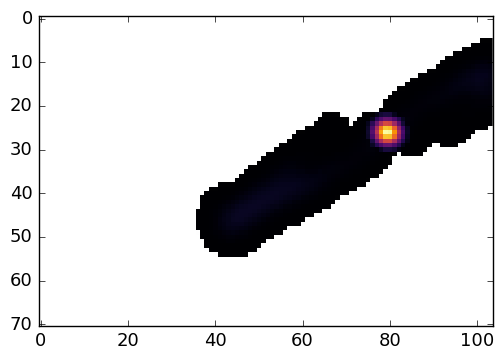

In [5]:
glmm.displayAllImages(0)

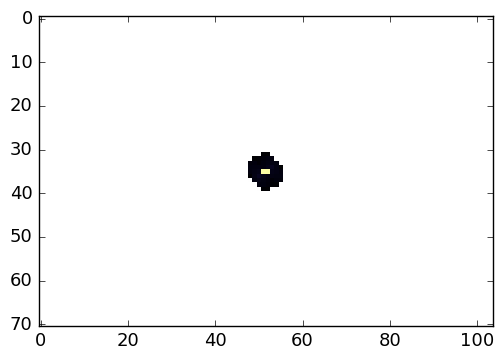

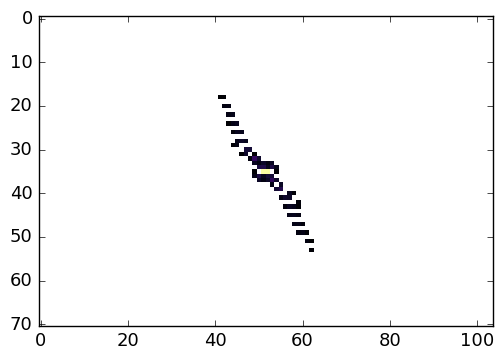

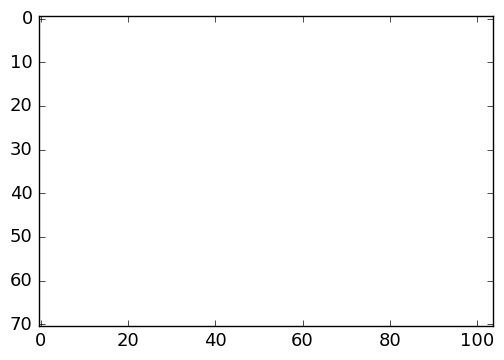

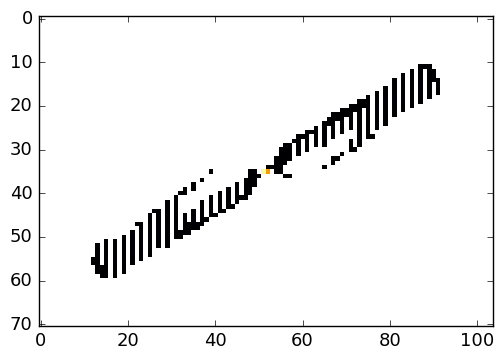

In [6]:
glmm.displayAllImages(imgType='intensity')

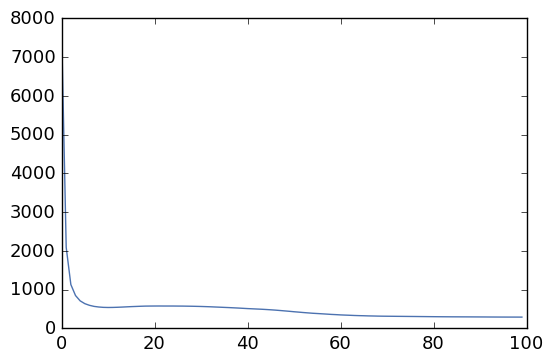

In [7]:
# Save this, it took a while to create
# The point: NMF converges after 100 iterations
plt.plot(glmm.frobenius[:100])

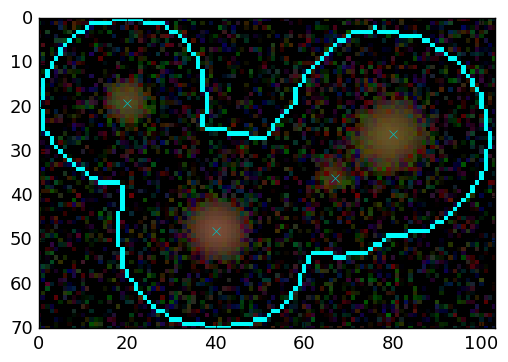

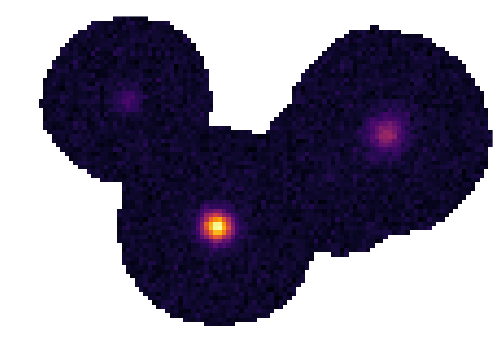

INFO:lsst.meas.deblender.proximal:constraints: M
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Beginning Loop
INFO:lsst.meas.deblender.proximal_nmf:190 iterations
INFO:lsst.meas.deblender.proximal:Filter g
INFO:lsst.meas.deblender.proximal:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender.proximal:Max difference: 0.474807141501
INFO:lsst.meas.deblender.proximal:Residual difference 7.4%
INFO:lsst.meas.deblender.proximal:Filter r
INFO:lsst.meas.deblender.proximal:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender.proximal:Max difference: 0.447213292122
INFO:lsst.meas.deblender.proximal:Residual difference 6.2%
INFO:lsst.meas.deblender.proximal:Filter i
INFO:lsst.meas.

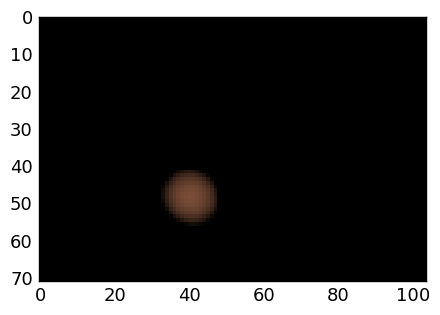

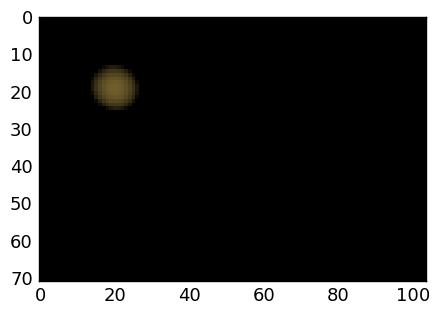

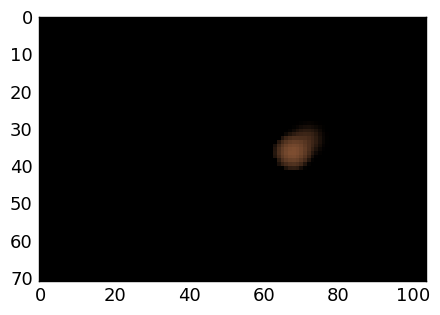

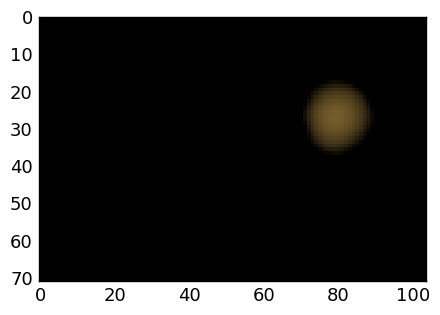

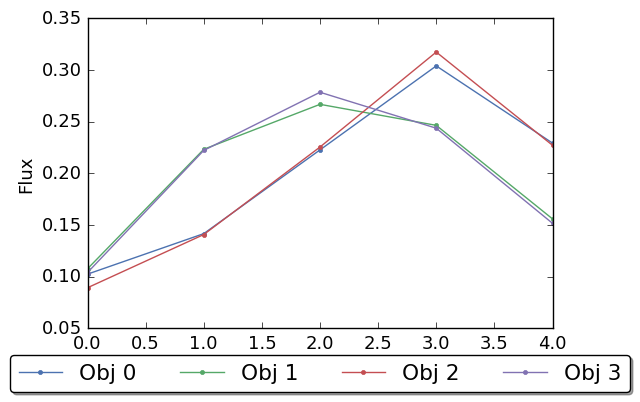

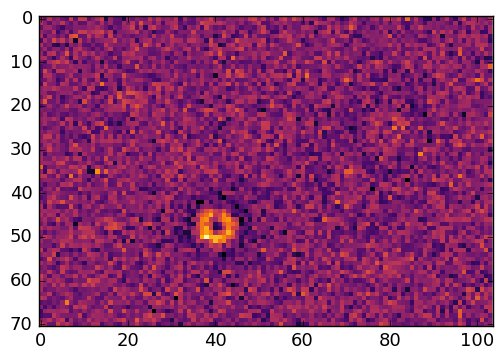

CPU times: user 15.2 s, sys: 371 ms, total: 15.6 s
Wall time: 15.6 s


In [4]:
%time stest = expDb.deblendParent(condition=condition, display=True, maxiter=500, constraints='M', nonSymmetricFill=0, algorithm="GLMM", usePsf=True, psfThresh=3e-3, l0_thresh=.005)

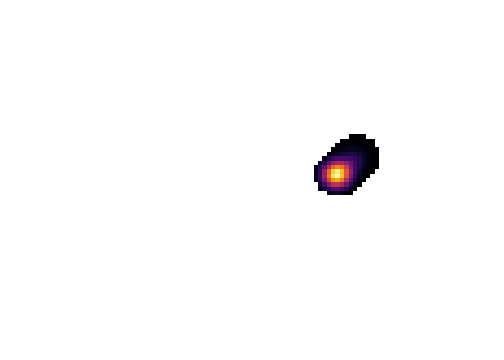

<module 'matplotlib.pyplot' from '/Users/fred/lsst/code/lsstswig2/miniconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [5]:
img = stest.psfOp[0].dot(stest.intensities[2].flatten()).reshape(stest.shape)
display.maskPlot(img, img==0)

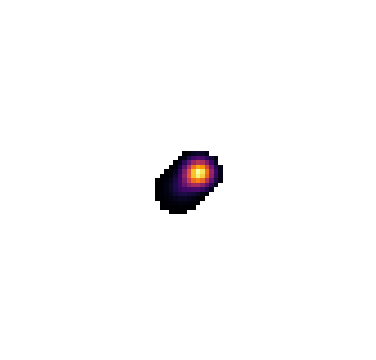

<module 'matplotlib.pyplot' from '/Users/fred/lsst/code/lsstswig2/miniconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [47]:
shape = stest.shape
px, py = stest.peakCoords[2]
indices = np.arange(img.size).reshape(shape)

def getPeakSymmetryIndices(shape, px, py):
    if py<(shape[0]-1)/2.:
        ymin = 0
        ymax = 2*py+1
    elif py>(shape[0]-1)/2.:
        ymin = 2*py-shape[0]+1
        ymax = shape[0]
    else:
        ymin = 0
        ymax = shape[0]
    if px<(shape[1]-1)/2.:
        xmin = 0
        xmax = 2*px+1
    elif px>(shape[1]-1)/2.:
        xmin = 2*px-shape[1]+1
        xmax = shape[1]
    else:
        xmin = 0
        xmax = shape[1]
    idx = indices[ymin:ymax, xmin:xmax]
    sidx = np.fliplr(np.flipud(patch))
    return idx, sidx

patch, symmetry = getPeakSymmetryIndices(shape, px, py)
display.maskPlot(img[np.unravel_index(symmetry, shape)])

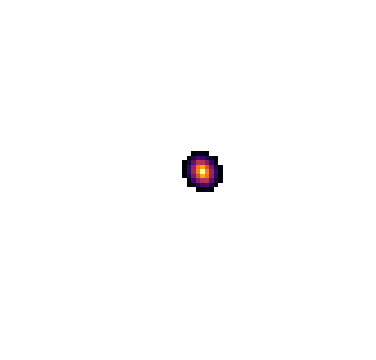

<module 'matplotlib.pyplot' from '/Users/fred/lsst/code/lsstswig2/miniconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [48]:
fimg = img.flatten()

simg = np.min([fimg[patch], fimg[symmetry]], axis=0)

display.maskPlot(simg)

In [13]:
np.max(glmm.psfs[1])

0.043181905842268303

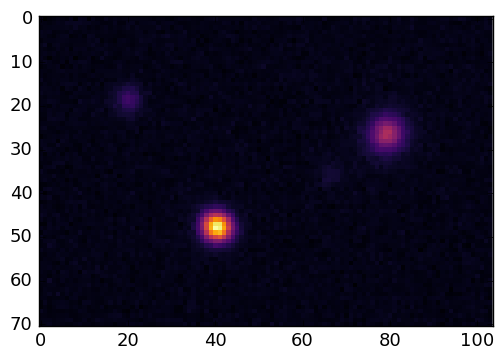

In [23]:
pmax = np.max(glmm.psfs, axis=(1,2))
data = np.zeros_like(glmm.data)
for b,p in enumerate(pmax):
    data[b] = p*glmm.data[b]
plt.imshow(data[2])

In [7]:
glmm.peakCoords

[(40, 48), (20, 19), (67, 36), (80, 26)]